In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("saas.csv")
df

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0
...,...,...,...,...,...
790453,2017-12-31,1029395,5790453,0.0,0.0
790454,2017-12-31,1029396,5790454,0.0,0.0
790455,2017-12-31,1029397,5790455,3.0,15.0
790456,2017-12-31,1029398,5790456,0.0,0.0


In [3]:
df.rename(columns={"Month_Invoiced": "invoice_month",
                    "Customer_Id": "customer_id",
                    "Invoice_Id": "invoice_id",
                    "Subscription_Type": "subscription_type",
                    "Amount": "amount"}, inplace=True)

In [4]:
df

,invoice_month,customer_id,invoice_id,subscription_type,amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0
...,...,...,...,...,...
790453,2017-12-31,1029395,5790453,0.0,0.0
790454,2017-12-31,1029396,5790454,0.0,0.0
790455,2017-12-31,1029397,5790455,3.0,15.0
790456,2017-12-31,1029398,5790456,0.0,0.0


In [5]:
for col in df.drop(columns=["invoice_month", "customer_id", "invoice_id"]).columns.tolist():
    print()
    print(df[col].value_counts())


0.0    496410
1.0    178212
2.0     70706
3.0     26474
4.0     18656
Name: subscription_type, dtype: int64

0.0     496410
5.0     178212
10.0     70706
15.0     26474
20.0     18656
Name: amount, dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
invoice_month        790458 non-null object
customer_id          790458 non-null int64
invoice_id           790458 non-null int64
subscription_type    790458 non-null float64
amount               790458 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


In [7]:
df.drop(columns=["customer_id", "invoice_id"]).describe()

,subscription_type,amount
count,790458.000000,790458.000000
mean,0.599235,2.996174
std,0.950380,4.751901
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,5.000000
max,4.000000,20.000000


In [8]:
df.isna().sum()

invoice_month        0
customer_id          0
invoice_id           0
subscription_type    0
amount               0
dtype: int64

In [9]:
print(f"The saas DataFrame is made up of {df.shape[0]:,} rows {df.shape[1]} columns.")

The saas DataFrame is made up of 790,458 rows 5 columns.


In [10]:
# unique customers
print(f"There are records for {len(df.customer_id.unique()):,} unique customers in the saas DataFrame.")

There are records for 29,400 unique customers in the saas DataFrame.


In [11]:
# unique invoices
print(f"""There are {len(df.invoice_id.unique()):,} unique invoices in the saas DataFrame.
I think it is safe to assume that each row represents a transaction.""")

There are 790,458 unique invoices in the saas DataFrame.
I think it is safe to assume that each row represents a transaction.


In [12]:
# unique subscription_types
print(f"There are {len(df.subscription_type.unique())} different subscription types in the saas data.")

There are 5 different subscription types in the saas data.


In [13]:
# unique subscription_types
print(f"There are {len(df.amount.unique())} different amounts in the saas data.")

There are 5 different amounts in the saas data.


In [14]:
# unique invoice_month
print(f"There are {len(df.invoice_month.unique())} months worth of data in the saas DataFrame.")

There are 48 months worth of data in the saas DataFrame.


In [15]:
df["invoice_month"] = pd.to_datetime(df["invoice_month"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
invoice_month        790458 non-null datetime64[ns]
customer_id          790458 non-null int64
invoice_id           790458 non-null int64
subscription_type    790458 non-null float64
amount               790458 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 30.2 MB


In [17]:
df.set_index("invoice_month", inplace=True)

In [18]:
df

,customer_id,invoice_id,subscription_type,amount
invoice_month,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0
2014-01-31,1000002,5000002,0.0,0.0
2014-01-31,1000003,5000003,0.0,0.0
2014-01-31,1000004,5000004,1.0,5.0
...,...,...,...,...
2017-12-31,1029395,5790453,0.0,0.0
2017-12-31,1029396,5790454,0.0,0.0
2017-12-31,1029397,5790455,3.0,15.0


In [19]:
train = df[:"2016-12-31"]
test = df["2017-01-31":]
train

,customer_id,invoice_id,subscription_type,amount
invoice_month,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0
2014-01-31,1000002,5000002,0.0,0.0
2014-01-31,1000003,5000003,0.0,0.0
2014-01-31,1000004,5000004,1.0,5.0
...,...,...,...,...
2016-12-31,1026995,5618164,0.0,0.0
2016-12-31,1026996,5618165,0.0,0.0
2016-12-31,1026997,5618166,0.0,0.0


In [20]:
test

,customer_id,invoice_id,subscription_type,amount
invoice_month,,,,
2017-01-31,1000003,5618169,1.0,5.0
2017-01-31,1000007,5618170,0.0,0.0
2017-01-31,1000010,5618171,1.0,5.0
2017-01-31,1000012,5618172,1.0,5.0
2017-01-31,1000013,5618173,1.0,5.0
...,...,...,...,...
2017-12-31,1029395,5790453,0.0,0.0
2017-12-31,1029396,5790454,0.0,0.0
2017-12-31,1029397,5790455,3.0,15.0


In [21]:
train.shape[0] + test.shape[0]

790458

In [22]:
# how much data is out-of-sample
print(f"The test DataFrame is made up of {test.shape[0]/df.shape[0]:.2%} of the originating DataFrame.")

The test DataFrame is made up of 21.80% of the originating DataFrame.


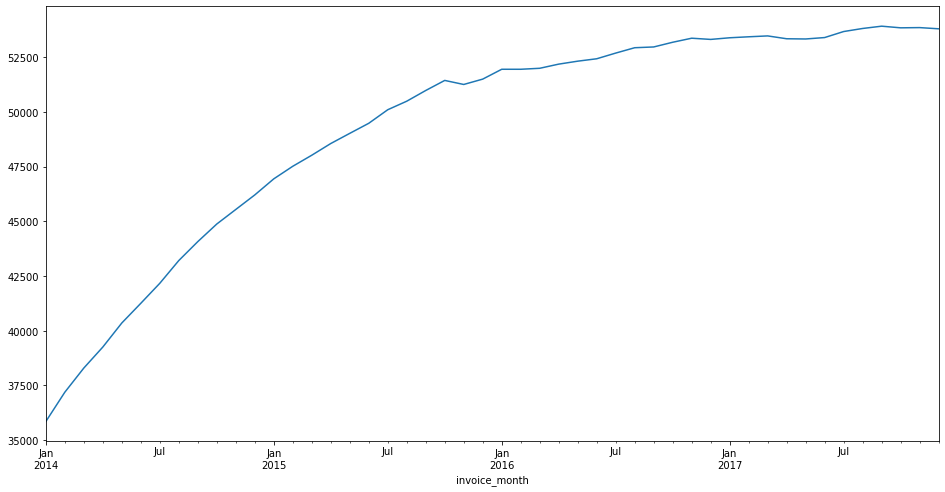

In [23]:
df.groupby("invoice_month").amount.sum().plot(figsize=(16, 8))
plt.show()

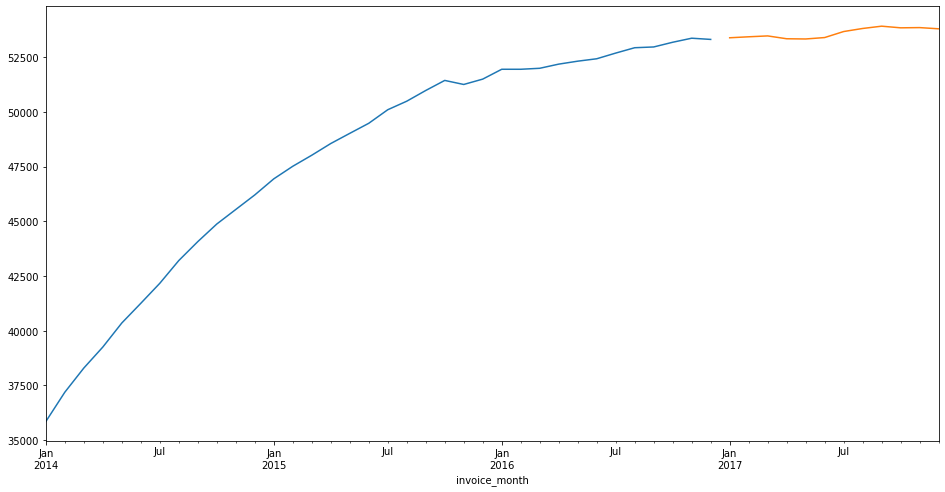

In [24]:
train.groupby("invoice_month").amount.sum().plot(figsize=(16, 8))
test.groupby("invoice_month").amount.sum().plot(figsize=(16, 8))
plt.show()

In [25]:
train.groupby("invoice_month").amount.sum()

invoice_month
2014-01-31    35850.0
2014-02-28    37190.0
2014-03-31    38295.0
2014-04-30    39255.0
2014-05-31    40355.0
2014-06-30    41255.0
2014-07-31    42170.0
2014-08-31    43210.0
2014-09-30    44075.0
2014-10-31    44880.0
2014-11-30    45545.0
2014-12-31    46210.0
2015-01-31    46945.0
2015-02-28    47520.0
2015-03-31    48025.0
2015-04-30    48560.0
2015-05-31    49025.0
2015-06-30    49485.0
2015-07-31    50105.0
2015-08-31    50495.0
2015-09-30    50985.0
2015-10-31    51445.0
2015-11-30    51260.0
2015-12-31    51505.0
2016-01-31    51955.0
2016-02-29    51955.0
2016-03-31    52000.0
2016-04-30    52190.0
2016-05-31    52325.0
2016-06-30    52435.0
2016-07-31    52695.0
2016-08-31    52940.0
2016-09-30    52975.0
2016-10-31    53190.0
2016-11-30    53375.0
2016-12-31    53320.0
Name: amount, dtype: float64